# DataLab Python for Data Analysis Walkthrough. 


### A few notes before we get started.

This project is on github. To download enter the following on the commandline.
```
git clone https://github.com/asfox/DataLab_PythonWorkshop_Olympics.git

```

I used [cookiecutter](https://cookiecutter.readthedocs.io/en/1.7.0/index.html) to organize this project. I'd recommend you do the same with your own projects. For something like this, it's probably overkill, but it's a good habit to start. To install cookiecutter, run the following on the commandline. 

``` 
pip install cookiecutter

cookiecutter https://github.com/drivendata/cookiecutter-data-science
# then follow the prompts.

```

# Intro to Jupyter Notebook
### this is _Markdown_

# Getting started

First thing to do is import some packages. 

Packages are just objects that you get from other files. Objects can have functions and hold data. Often when the object gets super complicated, people package it together into a nice, clean oject with some accompanying documentation. 

Not having all possible packages loaded by default allows python to load and run faster, only taking the time for things you need. 

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re as re

# Load our first dataset. 

This is data on olympians from a csv I found online. It's in the github. 

In [89]:
df_olympics = pd.read_csv('../data/raw/athlete_events.csv')

In [90]:
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Subset and organize your dataset. 

In [92]:
df_olympics = df_olympics[df_olympics['Season']=='Summer']

In [93]:
df_winners = df_olympics.groupby(['Team', 'Medal', 'Year']).count()['ID']

In [94]:
df_winners.head()

Team                   Medal   Year
A North American Team  Bronze  1900    4
Afghanistan            Bronze  2008    1
                               2012    1
Algeria                Bronze  1984    2
                               1992    1
Name: ID, dtype: int64

In [95]:
df_winners.unstack('Medal')
df_winners = df_winners.unstack('Medal').fillna(0).reset_index()


In [96]:
df_winners.head()

Medal,Team,Year,Bronze,Gold,Silver
0,A North American Team,1900,4.0,0.0,0.0
1,Afghanistan,2008,1.0,0.0,0.0
2,Afghanistan,2012,1.0,0.0,0.0
3,Algeria,1984,2.0,0.0,0.0
4,Algeria,1992,1.0,1.0,0.0


### Add variables. 

In [97]:
df_winners['Total Medals'] = df_winners[['Bronze', 'Gold', 'Silver']].sum(axis=1)


### Plot your data. 

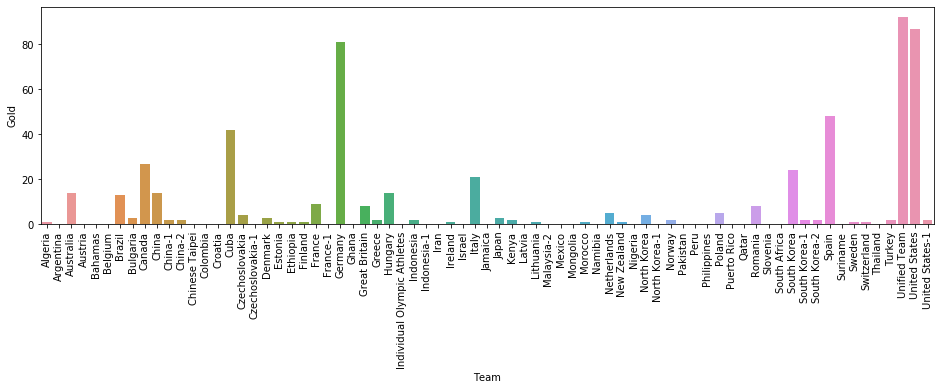

In [99]:
f, ax = plt.subplots(1,1,figsize=(16,4))
df_gold_winners = df_winners.loc[df_winners['Year']==1992]
ax = sns.barplot(x='Team', y='Gold', data=df_winners.loc[df_winners['Year']==1992])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


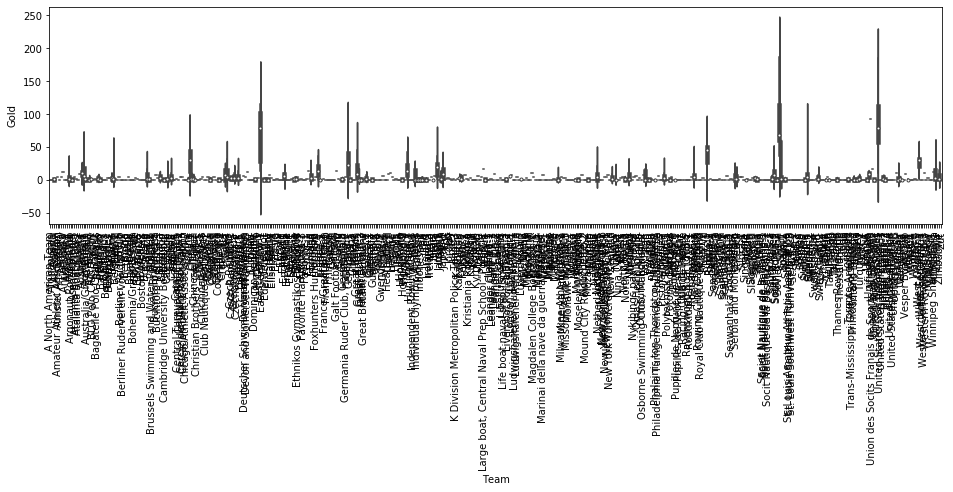

In [100]:
f, ax = plt.subplots(1,1,figsize=(16,4))
df_gold_winners = df_winners.loc[df_winners['Year']==1992]
ax = sns.violinplot(x='Team', y='Gold', data=df_winners)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);



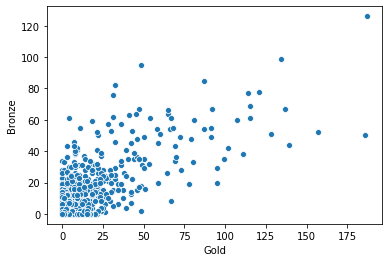

In [101]:
sns.scatterplot('Gold', 'Bronze', data=df_winners)

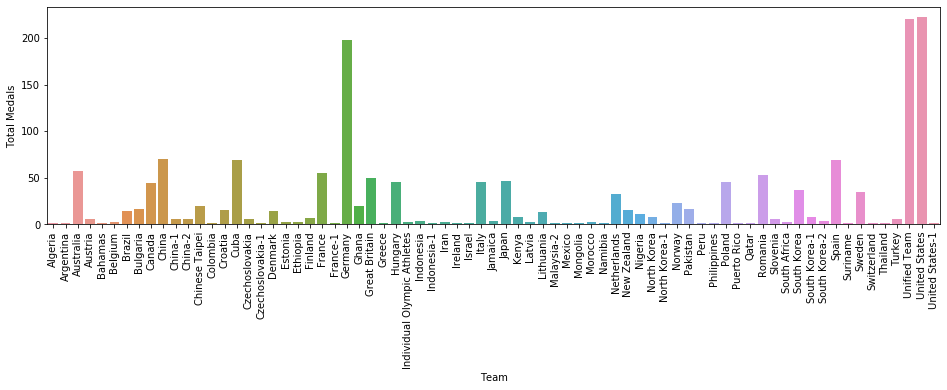

In [102]:
f, ax = plt.subplots(1,1,figsize=(16,4))
df_gold_winners = df_winners.loc[df_winners['Year']==1992]
ax = sns.barplot(x='Team', y='Total Medals', data=df_winners.loc[df_winners['Year']==1992])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);




## Challenge:

Do the same countries win the winter olympics? 

***

# Are winners just big countries? 

Load, clean, and merge our next dataset. 

### Load population data.

In [131]:
df_pop = pd.read_csv('../data/raw/population-figures-by-country-csv.csv')
df_pop.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [132]:
df_pop = df_pop.rename(columns=lambda x: re.sub('^Year_','',x))
df_pop.head()

,Country,Country_Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


### Clean population data. 

In [133]:
df_pop = df_pop.melt(id_vars=['Country', 'Country_Code'])
df_pop.columns = ['Country', 'Country_Code', 'Year', 'Population']

In [134]:
# df_winners.head()
df_pop.tail()


,Country,Country_Code,Year,Population
14986,Kosovo,XKX,2016,1816200.0
14987,"Yemen, Rep.",YEM,2016,27584213.0
14988,South Africa,ZAF,2016,55908865.0
14989,Zambia,ZMB,2016,16591390.0
14990,Zimbabwe,ZWE,2016,16150362.0


### Merge olympic data with population data. 

In [135]:
df_pop_winner = df_winners.merge(df_pop, left_on=['Team','Year'], 
                                 right_on=['Country', 'Year'], how='inner' )

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [136]:
print(df_pop['Year'].dtype, print(df_winners['Year'].dtype ) )
# df_pop['Year'].values

int64
object None


array(['1960', '1960', '1960', ..., '2016', '2016', '2016'], dtype=object)

### do a better job at cleaning data

In [137]:
df_pop['Year'] = pd.to_numeric(df_pop['Year'])
print(df_pop['Year'].dtype, print(df_winners['Year'].dtype ) )

int64
int64 None


### Now merge data. 

In [138]:
df_pop_winner = df_winners.merge(df_pop, left_on=['Team','Year'], 
                                 right_on=['Country', 'Year'], how='inner' )

In [139]:
df_pop_winner.head()

,Team,Year,Bronze,Gold,Silver,Total Medals,Country,Country_Code,Population
0,Afghanistan,2008,1.0,0.0,0.0,1.0,Afghanistan,AFG,27294031.0
1,Afghanistan,2012,1.0,0.0,0.0,1.0,Afghanistan,AFG,30696958.0
2,Algeria,1984,2.0,0.0,0.0,2.0,Algeria,DZA,21893853.0
3,Algeria,1992,1.0,1.0,0.0,2.0,Algeria,DZA,27181094.0
4,Algeria,1996,1.0,2.0,0.0,3.0,Algeria,DZA,29411415.0


### plot merged data

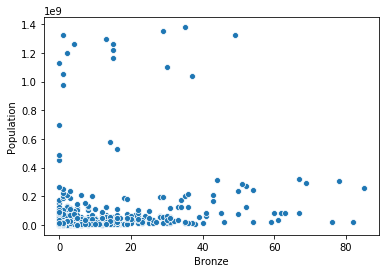

In [140]:
sns.scatterplot('Bronze', 'Population', data=df_pop_winner)

In [26]:
df_pop_winner['log10(Population)'] = np.log10(df_pop_winner['Population'])

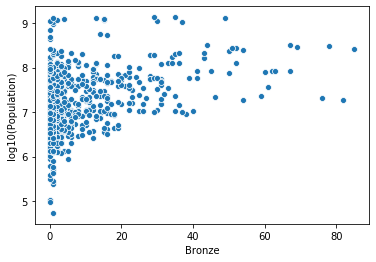

In [27]:
sns.scatterplot('Bronze', 'log10(Population)', data=df_pop_winner)

***

# Are rich countries winning?

I downloaded GDP data from online. This data is also in the github. 

https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

### load the data. 

In [143]:
df_gdp_raw = pd.read_csv('../data/raw/API_NY/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_820841.csv', 
                  skiprows=3)

In [144]:
df_gdp_raw.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09,NaN,NaN


### Clean the GDP data

In [145]:
print(df_gdp_raw.columns)
df_gdp_raw.drop( columns='Unnamed: 64', inplace=True )

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')


This is closer to how a good notebook _**should**_ look. 

In [146]:
df_gdp = df_gdp_raw.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

# select only GDP in current USD
df_gdp = df_gdp[ df_gdp['Indicator Name'] == 'GDP (current US$)' ]

# select columns, and fix names
df_gdp = df_gdp[['Country Name', 'Country Code', 'Indicator Name', 'variable', 'value']]
df_gdp.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Year', 'GDP']

# convert year to numeric
df_gdp['Year'] = pd.to_numeric( df_gdp['Year'] )

# convert GDP to numeric
df_gdp['GDP (in USD)'] = pd.to_numeric( df_gdp['GDP'] )


In [147]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Year,GDP,GDP (in USD)
0,Aruba,ABW,GDP (current US$),1960,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),1960,5.377778e+08,5.377778e+08
2,Angola,AGO,GDP (current US$),1960,NaN,NaN
3,Albania,ALB,GDP (current US$),1960,NaN,NaN
4,Andorra,AND,GDP (current US$),1960,NaN,NaN


### Merge olympic medal data and GDP data. 

In [148]:
df_gdp_winner = df_winners.merge(df_gdp, left_on=['Team','Year'], 
                                 right_on=['Country Name', 'Year'], how='inner' )

In [149]:
df_gdp_winner.head()

,Team,Year,Bronze,Gold,Silver,Total Medals,Country Name,Country Code,Indicator Name,GDP,GDP (in USD)
0,Afghanistan,2008,1.0,0.0,0.0,1.0,Afghanistan,AFG,GDP (current US$),1.010922e+10,1.010922e+10
1,Afghanistan,2012,1.0,0.0,0.0,1.0,Afghanistan,AFG,GDP (current US$),2.000162e+10,2.000162e+10
2,Algeria,1984,2.0,0.0,0.0,2.0,Algeria,DZA,GDP (current US$),5.369828e+10,5.369828e+10
3,Algeria,1992,1.0,1.0,0.0,2.0,Algeria,DZA,GDP (current US$),4.800330e+10,4.800330e+10
4,Algeria,1996,1.0,2.0,0.0,3.0,Algeria,DZA,GDP (current US$),4.694150e+10,4.694150e+10


### Plot olympic medals and GDP.

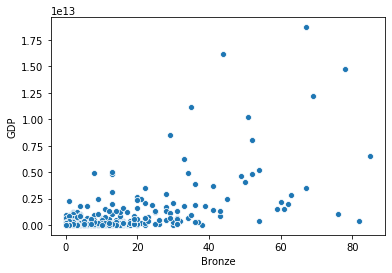

In [155]:
sns.scatterplot('Bronze', 'GDP', data=df_gdp_winner)

### create new variables

_If_ we were doing this not as a tutorial, this should be moved up, before we merge and plot. For a workshop or tutorial, I think it's clearer here. 

In [156]:
df_gdp_winner['log10(GDP)'] = np.log10(df_gdp_winner['GDP'])

### Plot log-scaled medals. 

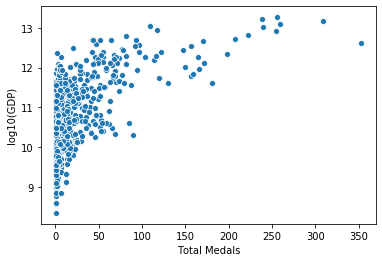

In [157]:
sns.scatterplot('Total Medals', 'log10(GDP)', data=df_gdp_winner)

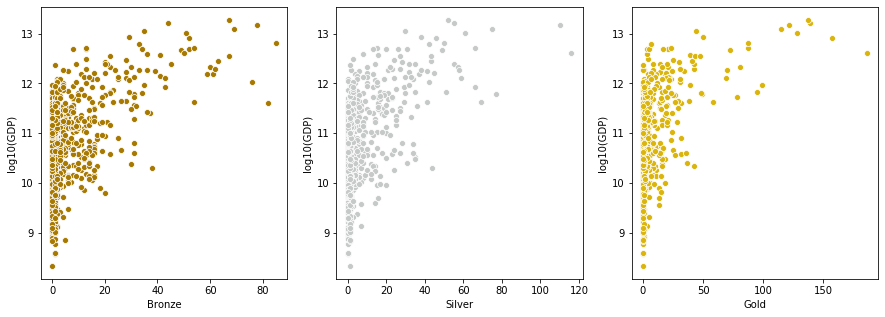

In [158]:
f, ax_list = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot('Bronze', 'log10(GDP)', data=df_gdp_winner, ax=ax_list[0], color=sns.xkcd_rgb['bronze'])
sns.scatterplot('Silver', 'log10(GDP)', data=df_gdp_winner, ax=ax_list[1], color=sns.xkcd_rgb['silver'])
sns.scatterplot('Gold', 'log10(GDP)', data=df_gdp_winner, ax=ax_list[2], color=sns.xkcd_rgb['gold'])



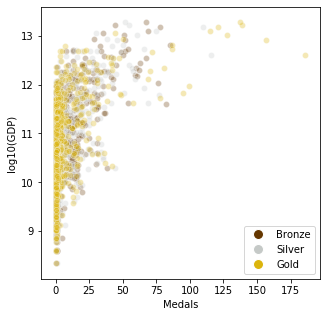

In [169]:
f, ax = plt.subplots(1,1,figsize=(5,5))

bronze = sns.scatterplot('Bronze', 'log10(GDP)', data=df_gdp_winner, ax=ax, alpha=.3, color=sns.xkcd_rgb['brown'])
silver = sns.scatterplot('Silver', 'log10(GDP)', data=df_gdp_winner, ax=ax, alpha=.3, color=sns.xkcd_rgb['silver'])
gold = sns.scatterplot('Gold', 'log10(GDP)', data=df_gdp_winner, ax=ax, alpha=.3, color=sns.xkcd_rgb['gold'])
ax.set_xlabel('Medals')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Bronze',
                          markerfacecolor=sns.xkcd_rgb['brown'], markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Silver',
                          markerfacecolor=sns.xkcd_rgb['silver'], markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Gold',
                          markerfacecolor=sns.xkcd_rgb['gold'], markersize=10),]

ax.legend(handles=legend_elements, loc='lower right')

plt.savefig( '../reports/figures/Log10GDP_vs_OlympicMedals.png', bbox_inches = "tight")

# Save our processsed data. 

Merge all the data that we've worked with into one dataframe. 

In [166]:
df_pop_gdp_winner = df_pop_winner.merge(df_gdp, left_on=['Team','Year'], 
                                 right_on=['Country Name', 'Year'], how='inner' )
df_pop_gdp_winner.head()

,Team,Year,Bronze,Gold,Silver,Total Medals,Country,Country_Code,Population,Country Name,Country Code,Indicator Name,GDP,GDP (in USD)
0,Afghanistan,2008,1.0,0.0,0.0,1.0,Afghanistan,AFG,27294031.0,Afghanistan,AFG,GDP (current US$),1.010922e+10,1.010922e+10
1,Afghanistan,2012,1.0,0.0,0.0,1.0,Afghanistan,AFG,30696958.0,Afghanistan,AFG,GDP (current US$),2.000162e+10,2.000162e+10
2,Algeria,1984,2.0,0.0,0.0,2.0,Algeria,DZA,21893853.0,Algeria,DZA,GDP (current US$),5.369828e+10,5.369828e+10
3,Algeria,1992,1.0,1.0,0.0,2.0,Algeria,DZA,27181094.0,Algeria,DZA,GDP (current US$),4.800330e+10,4.800330e+10
4,Algeria,1996,1.0,2.0,0.0,3.0,Algeria,DZA,29411415.0,Algeria,DZA,GDP (current US$),4.694150e+10,4.694150e+10


Save the merged dataframe as as .csv file in the processed data foler

In [167]:
df_pop_gdp_winner.to_csv('../data/processed/merged_winner_pop_gdp.csv', index=False)